Programming excercises from Rasmussen and Williams GP book

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Question 1

In [66]:
def kernel(x_1, x_2):
    """Return covariance kernel exp(-1/2|x_1p - x_2q|**2) for two vectors x_1, x_2"""
    sq_dist = np.sum(x_1**2, 1).reshape(-1, 1) + np.sum(x_2**2, 1) - 2*np.dot(x_1, x_2.T)
    return np.exp(-(0.5) * sq_dist)

In [67]:
def Gaussian(mean, cov, num_samples):
    L = np.linalg.cholesky(cov + 1e-6*np.eye(cov.shape[0]))
    samples = np.random.multivariate_normal(np.zeros(mean.shape), np.eye(cov.shape[0]), size=num_samples)
    return mean[:,None] + np.dot(L,samples.T)

(1000, 1000)


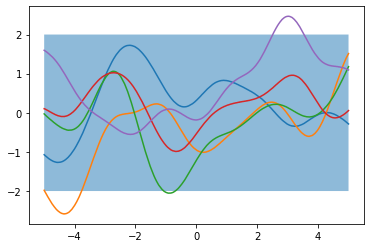

In [110]:
scalar_inputs = np.linspace(-5,5, 1000).reshape(-1,1)
K = kernel(scalar_inputs, scalar_inputs)
mean = np.zeros(scalar_inputs.shape[0])
train_samples = Gaussian(mean, K, 5)

for i in range(samples.shape[1]):
    plt.plot(scalar_inputs,train_samples.T[i,:])
print(K.shape)
plt.fill_between(scalar_inputs[:,0], mean - 2*np.diag(K)**0.5, mean + 2*np.diag(K)**0.5, alpha=0.5)

In [118]:
training_x = np.array([0.1,-4,-2.222]).reshape(-1,1)
training_f = np.array([5, 2, 4]).reshape(-1,1)

In [119]:
K_xstar_x = kernel(scalar_inputs, training_x)
K_x_xstar = kernel(training_x, scalar_inputs)
K_xstar_xstar = kernel(scalar_inputs, scalar_inputs)
K = kernel(training_x, training_x)

mean = np.dot(np.dot(K_xstar_x, np.linalg.inv(K)), training_f)
cov = K_xstar_xstar - np.dot(np.dot(K_xstar_x,np.linalg.inv(K)),K_x_xstar)

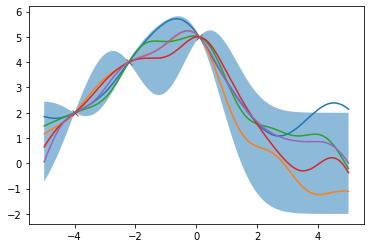

In [120]:
train_samples = Gaussian(mean[:,0], cov, 5)

for i in range(samples.shape[1]):
    plt.plot(scalar_inputs,train_samples.T[i,:])
    
plt.plot(training_x,training_f,'x')

plt.fill_between(scalar_inputs[:,0], mean[:,0] - 2*np.diag(cov)**0.5, mean[:,0] + 2*np.diag(cov)**0.5, alpha=0.5)

Question 3

Brownian Bridge

In [143]:
def bb_kernel(x_1, x_2):
    """Return covariance kernel exp(-1/2|x_1p - x_2q|**2) for two vectors x_1, x_2"""

    return np.minimum(x_1,x_2.T) - np.dot(x_1,x_2.T)

In [146]:
np.minimum(np.linspace(-5,5, 1000).reshape(-1,1), np.linspace(-5,5, 1000).reshape(-1,1).T)

array([[-5.        , -5.        , -5.        , ..., -5.        ,
        -5.        , -5.        ],
       [-5.        , -4.98998999, -4.98998999, ..., -4.98998999,
        -4.98998999, -4.98998999],
       [-5.        , -4.98998999, -4.97997998, ..., -4.97997998,
        -4.97997998, -4.97997998],
       ...,
       [-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.97997998,  4.97997998],
       [-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  4.98998999],
       [-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  5.        ]])

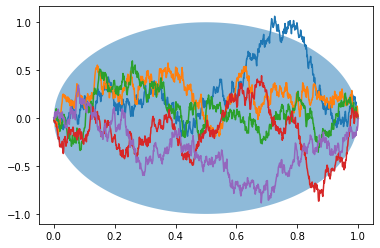

In [147]:
scalar_inputs = np.linspace(0,1, 1000).reshape(-1,1)
K = bb_kernel(scalar_inputs, scalar_inputs)
mean = np.zeros(scalar_inputs.shape[0])
train_samples = Gaussian(mean, K, 5)

for i in range(samples.shape[1]):
    plt.plot(scalar_inputs,train_samples.T[i,:])

plt.fill_between(scalar_inputs[:,0], mean - 2*np.diag(K)**0.5, mean + 2*np.diag(K)**0.5, alpha=0.5)